### Is word use across time modulated by media consumption type?
This is the acompanying code for my COG403 final project.

In [113]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from scipy import stats

# import visual and auditory data files

# data is preformated as 
# `word - strengthMean - average use per Million - 1820..`
visual = pd.read_csv("data/VisualAdjUse.csv") # length: 205
auditory = pd.read_csv("data/AuditoryAdjUse.csv") # length: 68


#### Preprocessing
First, clear all entries that have a less than an average of 1 use per million to decrease correlational outliers.

In [114]:
visualClean = visual.drop(visual[visual.ALL < 1].index) # length: 189
print(len(visualClean))
auditoryClean = auditory.drop(auditory[auditory.ALL < 1].index) # length: 63
print(len(auditoryClean))

189
63


#### Goal of analysis
1a) Identify how word use over time has changed for visual and auditory adjectives. Has it increased more for one than the other?

1b) Has word use changed significantly around the 1920s critical point? Analyze the word use from 1820s-1910s and 1920s-2010s

1c) are words that are more strongly visual or auditory experience differential growth from their less-strong counterparts? Concretely, graph slope vs. strength for visual and auditory.

2) Identify decades of most significant increase and decrease of word use for visual and auditory adjectives.

In [115]:
# Goal 1a + b

# Each individual word will produce a line of best fit slope 
# value using the parts per millions values for every decade.

visualCorrelations = []
auditoryCorrelations = []

visualAverageList = []
auditoryAverageList = []

visualAverageList_1820s = []
auditoryAverageList_1820s = []

visualAverageList_1920s = []
auditoryAverageList_1920s = []

years = np.arange(1, 21).tolist()
years_1920s = np.arange(1,11).tolist()

for index, row in visualClean.iterrows():
    # values for all years
    PPM_vals = row[3:]
    slope = np.polyfit(PPM_vals.tolist(), years, 1)[0]
    wordCorrelation = [row[0], row[1], slope]
    visualCorrelations.append(wordCorrelation)
    visualAverageList.append(slope)
    
    # 1820s - 1910s specifically
    slope_1820s = np.polyfit(row[3:13].tolist(), years_1920s, 1)[0]
    visualAverageList_1820s.append(slope_1820s)
    
    # 1920s and onward specifically
    slope_1920s = np.polyfit(row[13:].tolist(), years_1920s, 1)[0]
    visualAverageList_1920s.append(slope_1920s)
    
    
for index, row in auditoryClean.iterrows():
    # values for all years
    PPM_vals = row[3:]
    slope = np.polyfit(PPM_vals.tolist(), years, 1)[0]
    wordCorrelation = [row[0], row[1], slope]
    auditoryCorrelations.append(wordCorrelation)
    auditoryAverageList.append(slope)
    
    # 1820s - 1910s specifically
    slope_1820s = np.polyfit(row[3:13].tolist(), years_1920s, 1)[0]
    auditoryAverageList_1820s.append(slope_1820s)
    
    # 1920s and onward specifically
    slope_1920s = np.polyfit(row[13:].tolist(), years_1920s, 1)[0]
    auditoryAverageList_1920s.append(slope_1920s)

# compute averages and STDs for both the visual and auditory arrays

print("AVERAGES")
# all years
visualAverage = np.mean(visualAverageList)
auditoryAverage = np.mean(auditoryAverageList)
visualSTD = np.std(visualAverageList)
auditorySTD = np.std(auditoryAverageList)
print("All Years", visualAverage, auditoryAverage)

# 1820s-1910s
visualAverage_1820s = np.mean(visualAverageList_1820s)
auditoryAverage_1820s = np.mean(auditoryAverageList_1820s)
visualSTD_1820s = np.std(visualAverageList_1820s)
auditorySTD_1820s = np.std(auditoryAverageList_1820s)
print("1820s-1910s", visualAverage_1820s, auditoryAverage_1820s)

# 1920s-present
visualAverage_1920s = np.mean(visualAverageList_1920s)
auditoryAverage_1920s = np.mean(auditoryAverageList_1920s)
visualSTD_1920s = np.std(visualAverageList_1920s)
auditorySTD_1920s = np.std(auditoryAverageList_1920s)
print("1920s-present", visualAverage_1920s, auditoryAverage_1920s)

# compute t statistic and pvalue of the means
print("WELCH's TWO SAMPLES T TEST")

# all years
t_stat, p_stat = stats.ttest_ind(auditoryAverageList, visualAverageList, equal_var=False)
print("All Years", t_stat, p_stat)

# 1820s - 1910s
t_stat_1820s, p_stat_1820s = stats.ttest_ind(auditoryAverageList_1820s, visualAverageList_1820s, equal_var=False)
print("1820s-1910s", t_stat_1820s, p_stat_1820s)

# 1920s and onward values
t_stat_1920s, p_stat_1920s = stats.ttest_ind(auditoryAverageList_1920s, visualAverageList_1920s, equal_var=False)
print("1920s-present", t_stat_1920s, p_stat_1920s)

AVERAGES
All Years 0.6316033372815353 1.0830266443170455
1820s-1910s 1.2159166027181276 2.4686230425934963
1920s-present 0.38183317285066576 -0.47222081432273283
WELCH's TWO SAMPLES T TEST
All Years 1.0271436896668873 0.307225199218349
1820s-1910s 1.2352334981969162 0.2204245898261774
1920s-present -2.3427004945208783 0.02139579979673638


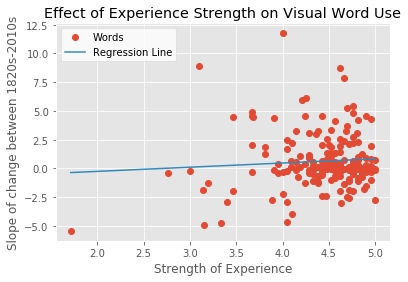

p-value for visual:  0.32292258731317625


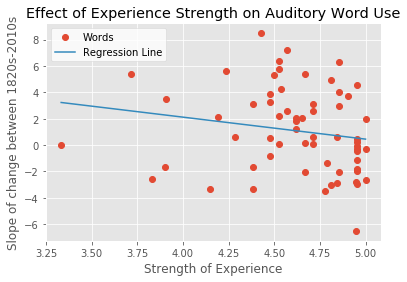

p-value for auditory:  0.15367331849883492


In [116]:
# Goal 1c

# graph visual and auditory average list against strength of association.
visualStrengths = np.array(visualClean["StrengthMean"])
auditoryStrengths = np.array(auditoryClean["StrengthMean"])

# calculate pearson correlations for both visual and auditory sets
slope_v, intercept_v, r_v, p_v, stderr_v = stats.linregress(visualStrengths, visualAverageList)
slope_a, intercept_a, r_a, p_a, stderr_a = stats.linregress(auditoryStrengths, auditoryAverageList)

# print(visualStrengths)
# plt.scatter(visualStrengths,visualAverageList)
# plt.scatter(auditoryStrengths,auditoryAverageList)

# # plt.plot(dates, values)
# plt.show()

fig, ax = plt.subplots()
ax.plot(visualStrengths, visualAverageList, linewidth=0, marker='o', label='Words')
ax.plot(visualStrengths, intercept_v + slope_v * visualStrengths, label="Regression Line")
ax.set_xlabel('Strength of Experience')
ax.set_ylabel('Slope of change between 1820s-2010s')
ax.set_title("Effect of Experience Strength on Visual Word Use")
ax.legend(facecolor='white')
plt.show()
print("p-value for visual: ", p_v)

fig, ax = plt.subplots()
ax.plot(auditoryStrengths, auditoryAverageList, linewidth=0, marker='o', label='Words')
ax.plot(auditoryStrengths, intercept_a + slope_a * auditoryStrengths, label="Regression Line")
ax.set_xlabel('Strength of Experience')
ax.set_title("Effect of Experience Strength on Auditory Word Use")
ax.set_ylabel('Slope of change between 1820s-2010s')
ax.legend(facecolor='white')
plt.show()
print("p-value for auditory: ", p_a)

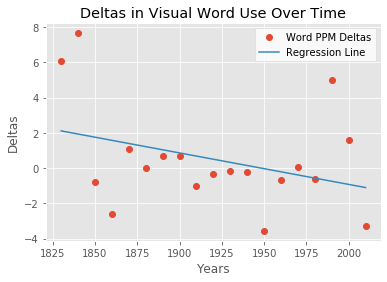

max delta:  1990
min delta:  1950
p_v2:  0.14822726405121314


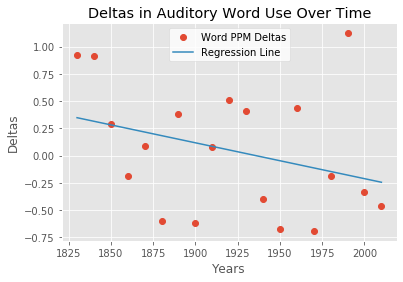

max delta:  1990
min delta:  1970
p_v2_aud:  0.1809726899793608


In [117]:
# Goal 2

# for each word, for each pair of decades, find the delta between the two and write to the relevant sub-array

# array of arrays managing the deltas between decades. First subarray is 1830s-1820s for every word, and so on.
deltas_main = []

for index, row in visualClean.iterrows():
    subArray = []
    targetVals = row[3:]
    for i in range(1, len(targetVals)):
        # subtract current targetVal from previous one and write to subArray
        subArray.append(targetVals[i] - targetVals[i-1])
    deltas_main.append(subArray)

# now stack deltas_main and plot the changes for each decade with lingress
years_full = np.array(np.arange(1830, 2020, 10))

df = pd.DataFrame(deltas_main, columns=[1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])

meanDeltas = []
for column in df:
    meanDeltas.append(np.mean(df[column]))

slope_v2, intercept_v2, r_v2, p_v2, stderr_v2 = stats.linregress(years_full, meanDeltas)

fig, ax = plt.subplots()
ax.plot(years_full, meanDeltas, linewidth=0, marker='o', label='Word PPM Deltas')
ax.plot(years_full, intercept_v2 + slope_v2 * years_full, label="Regression Line")
ax.set_xlabel('Years')
ax.set_ylabel('Deltas')
ax.set_title("Deltas in Visual Word Use Over Time")
ax.legend(facecolor='white')
plt.show()

# Find the highest and lowest delta after 1900. 
trunc_mean_deltas = meanDeltas[7:]
max_visual = max(trunc_mean_deltas)
max_index_visual = trunc_mean_deltas.index(max_visual)
min_visual = min(trunc_mean_deltas)
min_index_visual = trunc_mean_deltas.index(min_visual)
print("max delta: ", years_full[max_index_visual + 7])
print("min delta: ", years_full[min_index_visual + 7])
print("p_v2: ", p_v2)


## Repeat the same procedure for Auditory

# array of arrays managing the deltas between decades. First subarray is 1830s-1820s for every word, and so on.
deltas_main_aud = []

for index, row in auditoryClean.iterrows():
    subArray = []
    targetVals = row[3:]
    for i in range(1, len(targetVals)):
        # subtract current targetVal from previous one and write to subArray
        subArray.append(targetVals[i] - targetVals[i-1])
    deltas_main_aud.append(subArray)

df_aud = pd.DataFrame(deltas_main_aud, columns=[1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])

meanDeltas_aud = []
for column in df:
    meanDeltas_aud.append(np.mean(df_aud[column]))

slope_v2_aud, intercept_v2_aud, r_v2_aud, p_v2_aud, stderr_v2_aud = stats.linregress(years_full, meanDeltas_aud)

fig, ax = plt.subplots()
ax.plot(years_full, meanDeltas_aud, linewidth=0, marker='o', label='Word PPM Deltas')
ax.plot(years_full, intercept_v2_aud + slope_v2_aud * years_full, label="Regression Line")
ax.set_xlabel('Years')
ax.set_ylabel('Deltas')
ax.set_title("Deltas in Auditory Word Use Over Time")
ax.legend(facecolor='white')
plt.show()

# Find the highest and lowest delta after 1900. 
trunc_mean_deltas_aud = meanDeltas_aud[7:]
max_visual_aud = max(trunc_mean_deltas_aud)
max_index_visual_aud = trunc_mean_deltas_aud.index(max_visual_aud)
min_visual_aud = min(trunc_mean_deltas_aud)
min_index_visual_aud = trunc_mean_deltas_aud.index(min_visual_aud)
print("max delta: ", years_full[max_index_visual_aud + 7])
print("min delta: ", years_full[min_index_visual_aud + 7])

print("p_v2_aud: ", p_v2_aud)